In [1]:
"""A telecommunications organization has offices spanned across multiple
locations around the globe. It has to use leased phone lines for connecting all these offices with
each other. The organization, wants to use minimum cost for connecting all its offices. This
requires that all the offices should be connected using a minimum number of leased lines so as to
reduce the effective cost.

A. Consider the following for deciding connections in same state in India:
i. Find the latitude and longitude of cities in same state. Consider 4 to 6 cities.
ii. Calculate the cost of connecting each pair of offices by computing the distance
between different pair of different cities (as considered in part A) and construct a
fully connected graph.
iii. Compute a minimum spanning tree using either Prims or Kruskals Method to find the
cost of connecting offices in different cities.
B. Repeat the above for cities in different states.
"""


'A telecommunications organization has offices spanned across multiple\nlocations around the globe. It has to use leased phone lines for connecting all these offices with\neach other. The organization, wants to use minimum cost for connecting all its offices. This\nrequires that all the offices should be connected using a minimum number of leased lines so as to\nreduce the effective cost.\n\nA. Consider the following for deciding connections in same state in India:\ni. Find the latitude and longitude of cities in same state. Consider 4 to 6 cities.\nii. Calculate the cost of connecting each pair of offices by computing the distance\nbetween different pair of different cities (as considered in part A) and construct a\nfully connected graph.\niii. Compute a minimum spanning tree using either Prims or Kruskals Method to find the\ncost of connecting offices in different cities.\nB. Repeat the above for cities in different states.\n'

In [2]:
from geopy.distance import geodesic
import csv


# function to create graph
def create_graph(selected_cities,filename):
    longitude_and_latitude = []
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="prims_algo_excercise")
    for city in selected_cities:
        location = geolocator.geocode(city)
        longitude_and_latitude.append((location.longitude,location.latitude))
    distance_matrix = []
    for i in range(len(longitude_and_latitude)):
        distance_matrix.append([])
        for j in range(len(longitude_and_latitude)):
            distance_matrix[i].append(geodesic(longitude_and_latitude[i],longitude_and_latitude[j]).km)
    with open(filename,'w') as file:
        writer = csv.writer(file)
        writer.writerow([''] + selected_cities)
        for i in range(len(distance_matrix)):
            writer.writerow([selected_cities[i]] + distance_matrix[i])
    return distance_matrix


# for 4 cities in same state
selected_cities_4_in_same = ['nagpur','pune','aurangabad','mumbai']

# for 5 cities in same state
selected_cities_5_in_same = ['nagpur','pune','aurangabad','mumbai','latur']

# for 6 cities in same state
selected_cities_6_in_same = ['nagpur','pune','aurangabad','mumbai','latur','solapur']

# for 4 cities in different states
selected_cities_4_in_different = ['nagpur','delhi','kochi','patna']

# for 5 cities in different states
selected_cities_5_in_different = ['nagpur','delhi','kochi','patna','bangalore']

# for 6 cities in different states
selected_cities_6_in_different = ['nagpur','delhi','kochi','patna','bangalore','goa']


# Part 4: Creating the graph for 4 cities in same state
create_graph(selected_cities_4_in_same,'/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_4_cities.csv')

# Part 5: Creating the graph for 5 cities in same state
create_graph(selected_cities_5_in_same,'/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_5_cities.csv')

# Part 6: Creating the graph for 6 cities in same state
create_graph(selected_cities_6_in_same,'/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_6_cities.csv')

# Part 7: Creating the graph for 4 cities in different states
create_graph(selected_cities_4_in_different,'/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_4_cities.csv')

# Part 8: Creating the graph for 5 cities in different states
create_graph(selected_cities_5_in_different,'/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_5_cities.csv')

# Part 9: Creating the graph for 6 cities in different states
create_graph(selected_cities_6_in_different,'/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_6_cities.csv')

[[0.0,
  273.4628909186685,
  412.71795226669076,
  677.6185512310851,
  248.20717230636185,
  577.3084262530367],
 [273.4628909186685,
  0.0,
  487.87698430583146,
  889.1555168174198,
  383.5126013172784,
  503.00181332302566],
 [412.71795226669076,
  487.87698430583146,
  0.0,
  1021.9199458631721,
  168.23589037701714,
  285.02117266639897],
 [677.6185512310851,
  889.1555168174198,
  1021.9199458631721,
  0.0,
  862.555831981093,
  1244.9531644885553],
 [248.20717230636185,
  383.5126013172784,
  168.23589037701714,
  862.555831981093,
  0.0,
  396.24262386578744],
 [577.3084262530367,
  503.00181332302566,
  285.02117266639897,
  1244.9531644885553,
  396.24262386578744,
  0.0]]

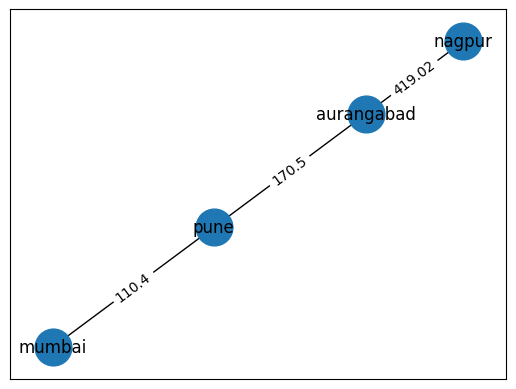

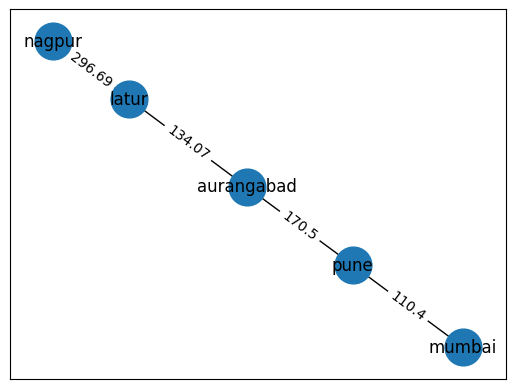

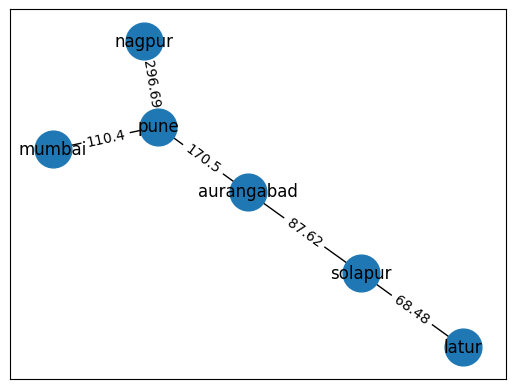

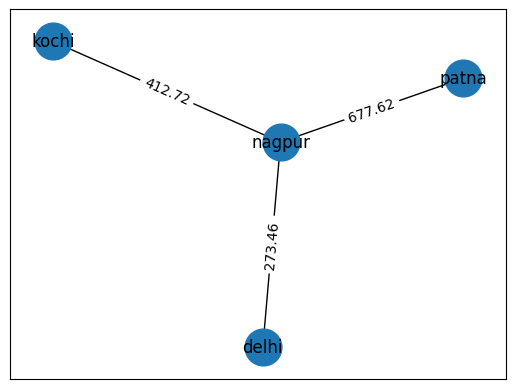

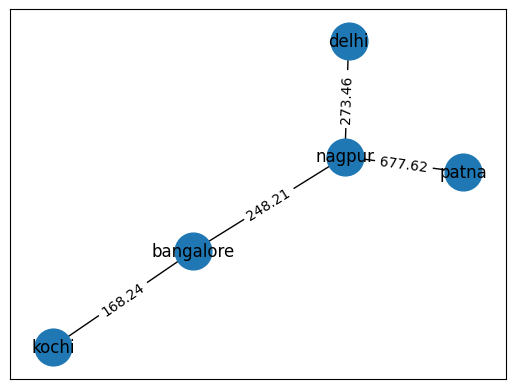

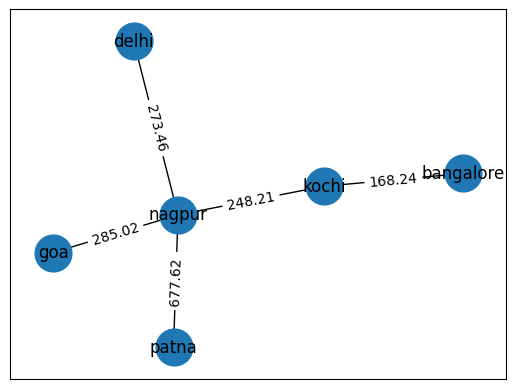

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# function to replace numbers with city names
def convert_result_to_city_names(result,adjacency_matrix):
    result = result.tolist()
    result[0] = int(result[0])
    result[1] = int(result[1])
    return adjacency_matrix.columns[result[0]+1],adjacency_matrix.columns[result[1]+1]


# function to replace all the rows in the result with city names
def convert_all_result_to_city_names(df,adjacency_matrix):
    result = []
    for i in range(len(df)):
        result.append(convert_result_to_city_names(df.iloc[i,:],adjacency_matrix))
    return result


# function to replace source and destination column values with city names
def replace_source_and_destination_with_city_names(df,adjacency_matrix):
    result = convert_all_result_to_city_names(df,adjacency_matrix)
    for i in range(len(result)):
        df.iloc[i,0] = result[i][0]
        df.iloc[i,1] = result[i][1]
    return df


# function that reads the result csv and ajacency matrix csv and returns the result with city names
def get_result_with_city_names(result_csv,adjacency_matrix_csv):
    df = pd.read_csv(result_csv)
    adjacency_matrix = pd.read_csv(adjacency_matrix_csv)
    return replace_source_and_destination_with_city_names(df,adjacency_matrix)

# function to plot the graph using networkx with labels as city names
def plot_graph(res):
    G = nx.Graph()
    for i in range(len(res)):
        G.add_edge(res.iloc[i,0],res.iloc[i,1],weight=res.iloc[i,2])
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_size=700)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()


# single function to plot the graph from csv
def plot_graph_from_csv(result_csv,adjacency_matrix_csv):
    res = get_result_with_city_names(result_csv,adjacency_matrix_csv)
    plot_graph(res)


# plot the graph for 4 cities in same state
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_4_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_4_cities.csv')

# plot the graph for 5 cities in same state
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_5_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_5_cities.csv')

# plot the graph for 6 cities in same state
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_6_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_6_cities.csv')

# plot the graph for 4 cities in different states
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_4_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_4_cities.csv')

# plot the graph for 5 cities in different states
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_5_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_5_cities.csv')

# plot the graph for 6 cities in different states
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_6_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_6_cities.csv')

